### The aim of this project is to analyse the givn Coronvirus dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import datetime

In [2]:
df=pd.read_csv("aggregate_covid_country.txt")
df.tail(10)

,Date,Country,Confirmed,Recovered,Deaths
23678,2020-05-26,United Kingdom,266599,1161,37130
23679,2020-05-26,Uruguay,789,638,22
23680,2020-05-26,Uzbekistan,3290,2636,14
23681,2020-05-26,Venezuela,1211,302,11
23682,2020-05-26,Vietnam,327,272,0
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


## Extracting day,month and year

In [3]:
df1=pd.DataFrame(df,columns=["Date"])

In [4]:
df1['year']=pd.DatetimeIndex(df1['Date']).year

In [5]:
df1['month']=pd.DatetimeIndex(df1['Date']).month

In [6]:
df1['day']=pd.DatetimeIndex(df1['Date']).day

In [7]:
df1.drop(['Date','year'],axis=1,inplace=True)
df1.head()

,month,day
0,1,22
1,1,22
2,1,22
3,1,22
4,1,22


In [8]:
df1.month.value_counts()

3    5828
4    5640
2    5452
5    4888
1    1880
Name: month, dtype: int64

In [9]:
df.drop(['Date'],axis=1,inplace=True)

In [10]:
df=pd.concat([df,df1],axis=1)

In [11]:
df.head()

,Country,Confirmed,Recovered,Deaths,month,day
0,Afghanistan,0,0,0,1,22
1,Albania,0,0,0,1,22
2,Algeria,0,0,0,1,22
3,Andorra,0,0,0,1,22
4,Angola,0,0,0,1,22


In [12]:
df.shape

(23688, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 6 columns):
Country      23688 non-null object
Confirmed    23688 non-null int64
Recovered    23688 non-null int64
Deaths       23688 non-null int64
month        23688 non-null int64
day          23688 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


## Creating different datasets for different months by taking the last day's count

In [14]:
Jan=df[df['month']==1 & (df['day']==31)]
Feb=df[(df['month']==2) & (df['day']==29)]
Mar=df[(df['month']==3) & (df['day']==31)]
Apr=df[(df['month']==4) & (df['day']==30)]
May=df[(df['month']==5) & (df['day']==26)]

In [15]:
df1=Jan.sort_values(by=['Confirmed'],ascending=False).head(15)
df1

,Country,Confirmed,Recovered,Deaths,month,day
1728,China,9802,214,213,1,31
1860,Thailand,19,5,0,1,31
1779,Japan,15,1,0,1,31
1844,Singapore,13,0,0,1,31
1783,"Korea, South",11,0,0,1,31
1857,Taiwan*,10,0,0,1,31
1700,Australia,9,2,0,1,31
1799,Malaysia,8,0,0,1,31
1866,US,7,0,0,1,31
1754,France,5,0,0,1,31


In [16]:
#Calculating Percentage of death
df1['Death rate']=df1.apply(lambda x:((x.Deaths/x.Confirmed)),axis=1)
df1.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate
1728,China,9802,214,213,1,31,0.02173
1860,Thailand,19,5,0,1,31,0.00000
1779,Japan,15,1,0,1,31,0.00000
1844,Singapore,13,0,0,1,31,0.00000
1783,"Korea, South",11,0,0,1,31,0.00000


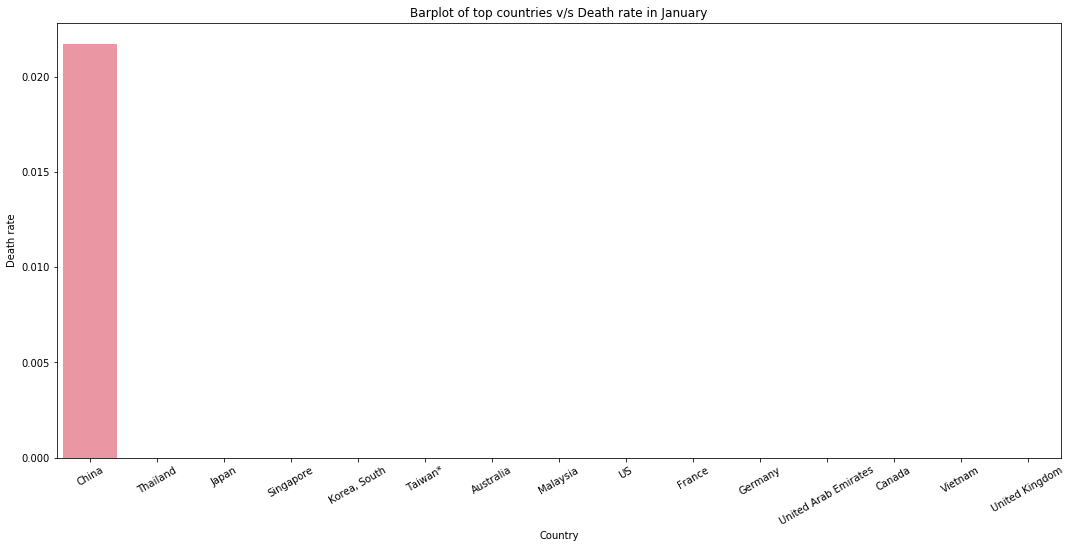

In [17]:
plt.figure(figsize=(18,8))
plt.title("Barplot of top countries v/s Death rate in January")
plt.xticks(rotation=30)
sns.barplot(df1['Country'],df1['Death rate'])
plt.show()

In [18]:
#Calculating percentage of recovery
df1['Recovery rate']=df1.apply(lambda x:((x.Recovered/x.Confirmed)),axis=1)
df1.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate,Recovery rate
1728,China,9802,214,213,1,31,0.02173,0.021832
1860,Thailand,19,5,0,1,31,0.00000,0.263158
1779,Japan,15,1,0,1,31,0.00000,0.066667
1844,Singapore,13,0,0,1,31,0.00000,0.000000
1783,"Korea, South",11,0,0,1,31,0.00000,0.000000


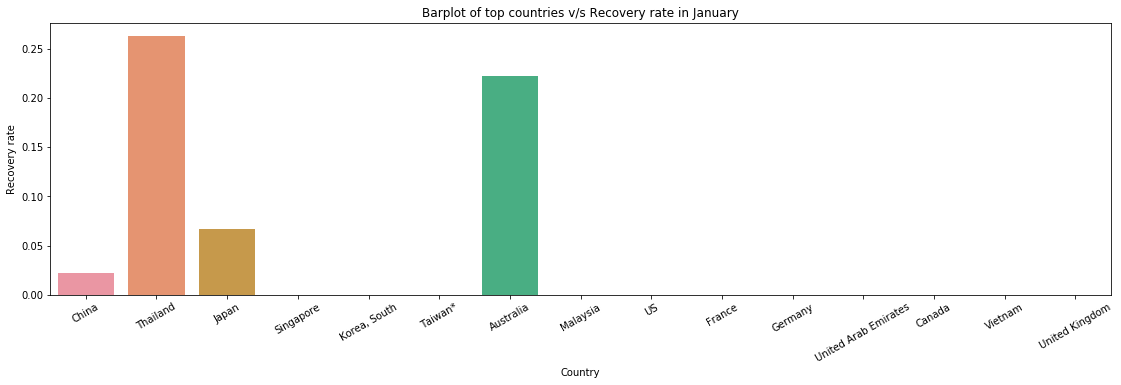

In [19]:
plt.figure(figsize=(19,5))
plt.title("Barplot of top countries v/s Recovery rate in January")
sns.barplot(df1['Country'],df1['Recovery rate'])
plt.xticks(rotation=30)
plt.show()

Thailand has the highest recovery rate in January

## February

In [20]:
df2=Feb.sort_values(by=['Confirmed'],ascending=False).head(15)
df2

,Country,Confirmed,Recovered,Deaths,month,day
7180,China,79356,39320,2837,2,29
7235,"Korea, South",3150,27,16,2,29
7229,Italy,1128,46,29,2,29
7192,Diamond Princess,705,10,6,2,29
7225,Iran,593,123,43,2,29
7231,Japan,241,32,5,2,29
7296,Singapore,102,72,0,2,29
7206,France,100,12,2,2,29
7210,Germany,79,16,0,2,29
7318,US,68,7,1,2,29


In [21]:
#Percentage rise in deaths in China
h=((df2.iloc[0,3])-(df1.iloc[0,3]))/(df1.iloc[0,3])
h

12.31924882629108

In [22]:
df2['Death rate']=df2.apply(lambda x:((x.Deaths/x.Confirmed)),axis=1)
df2.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate
7180,China,79356,39320,2837,2,29,0.035750
7235,"Korea, South",3150,27,16,2,29,0.005079
7229,Italy,1128,46,29,2,29,0.025709
7192,Diamond Princess,705,10,6,2,29,0.008511
7225,Iran,593,123,43,2,29,0.072513


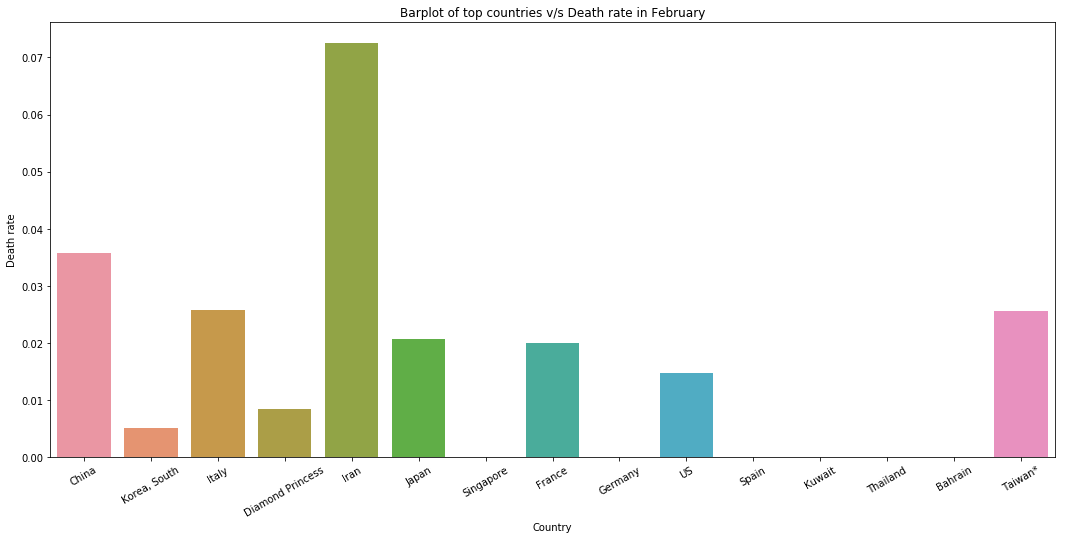

In [23]:
plt.figure(figsize=(18,8))
plt.title("Barplot of top countries v/s Death rate in February")
plt.xticks(rotation=30)
sns.barplot(df2['Country'],df2['Death rate'])
plt.show()

Iran is having the highest percentage of death in February

In [24]:
df2['Recovery rate']=df2.apply(lambda x:((x.Recovered/x.Confirmed)),axis=1)
df2.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate,Recovery rate
7180,China,79356,39320,2837,2,29,0.035750,0.495489
7235,"Korea, South",3150,27,16,2,29,0.005079,0.008571
7229,Italy,1128,46,29,2,29,0.025709,0.040780
7192,Diamond Princess,705,10,6,2,29,0.008511,0.014184
7225,Iran,593,123,43,2,29,0.072513,0.207420


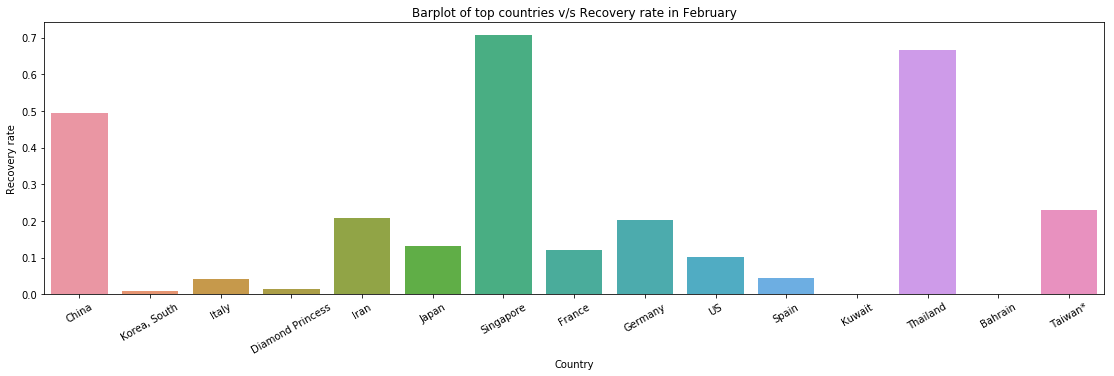

In [25]:
plt.figure(figsize=(19,5))
plt.title("Barplot of top countries v/s Recovery rate in February")
sns.barplot(df2['Country'],df2['Recovery rate'])
plt.xticks(rotation=30)
plt.show()

Singapore and Thailand are having good percentage of recovery in February

## MARCH

In [26]:
df3=Mar.sort_values(by=['Confirmed'],ascending=False).head(15)
df3

,Country,Confirmed,Recovered,Deaths,month,day
13146,US,188172,7024,5367,3,31
13057,Italy,105792,15729,12428,3,31
13130,Spain,95923,19259,8464,3,31
13008,China,82279,76206,3309,3,31
13038,Germany,71808,16100,775,3,31
13034,France,52827,9513,3532,3,31
13053,Iran,44605,14656,2898,3,31
13150,United Kingdom,25481,179,2429,3,31
13135,Switzerland,16605,1823,433,3,31
13145,Turkey,13531,243,214,3,31


In [27]:
df3['Death rate']=df3.apply(lambda x:((x.Deaths/x.Confirmed)),axis=1)
df3.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate
13146,US,188172,7024,5367,3,31,0.028522
13057,Italy,105792,15729,12428,3,31,0.117476
13130,Spain,95923,19259,8464,3,31,0.088237
13008,China,82279,76206,3309,3,31,0.040217
13038,Germany,71808,16100,775,3,31,0.010793


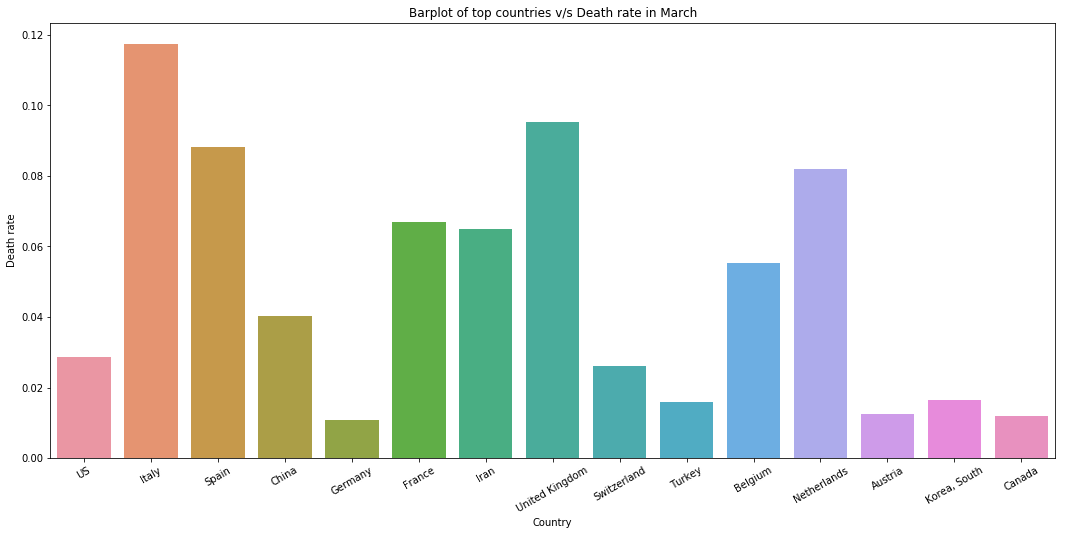

In [28]:
plt.figure(figsize=(18,8))
plt.title("Barplot of top countries v/s Death rate in March")
plt.xticks(rotation=30)
sns.barplot(df3['Country'],df3['Death rate'])
plt.show()

Death rate in Italy is the highest in March

In [29]:
df3['Recovery rate']=df3.apply(lambda x:((x.Recovered/x.Confirmed)),axis=1)
df3.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate,Recovery rate
13146,US,188172,7024,5367,3,31,0.028522,0.037328
13057,Italy,105792,15729,12428,3,31,0.117476,0.148679
13130,Spain,95923,19259,8464,3,31,0.088237,0.200776
13008,China,82279,76206,3309,3,31,0.040217,0.926190
13038,Germany,71808,16100,775,3,31,0.010793,0.224209


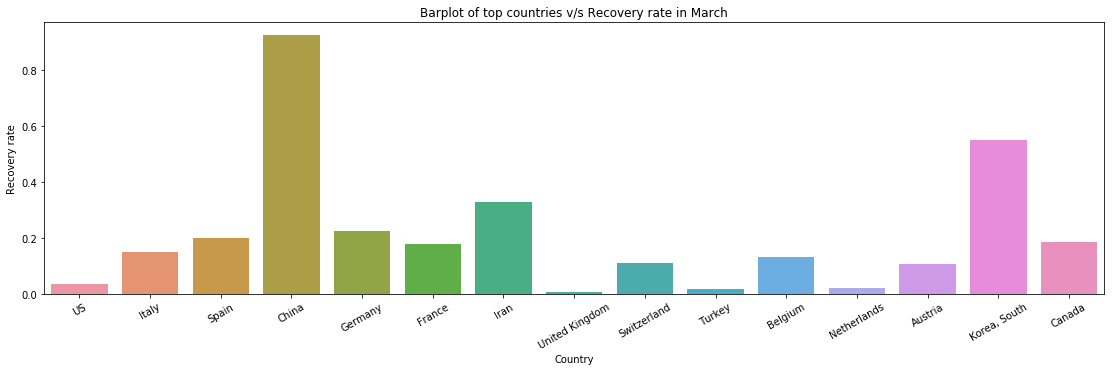

In [30]:
plt.figure(figsize=(19,5))
plt.title("Barplot of top countries v/s Recovery rate in March")
sns.barplot(df3['Country'],df3['Recovery rate'])
plt.xticks(rotation=30)
plt.show()

China is having the highest recovery rate in March

## April

In [31]:
df4=Apr.sort_values(by=['Confirmed'],ascending=False).head(15)
df4

,Country,Confirmed,Recovered,Deaths,month,day
18786,US,1069424,153947,62996,4,30
18770,Spain,213435,112050,24543,4,30
18697,Italy,205463,75945,27967,4,30
18790,United Kingdom,172481,859,26842,4,30
18674,France,167299,49476,24379,4,30
18678,Germany,163009,123500,6623,4,30
18785,Turkey,120204,48886,3174,4,30
18752,Russia,106498,11619,1073,4,30
18693,Iran,94640,75103,6028,4,30
18635,Brazil,87187,35935,6006,4,30


In [32]:
df4['Death rate']=df4.apply(lambda x:((x.Deaths/x.Confirmed)),axis=1)
df4.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate
18786,US,1069424,153947,62996,4,30,0.058906
18770,Spain,213435,112050,24543,4,30,0.114991
18697,Italy,205463,75945,27967,4,30,0.136117
18790,United Kingdom,172481,859,26842,4,30,0.155623
18674,France,167299,49476,24379,4,30,0.145721


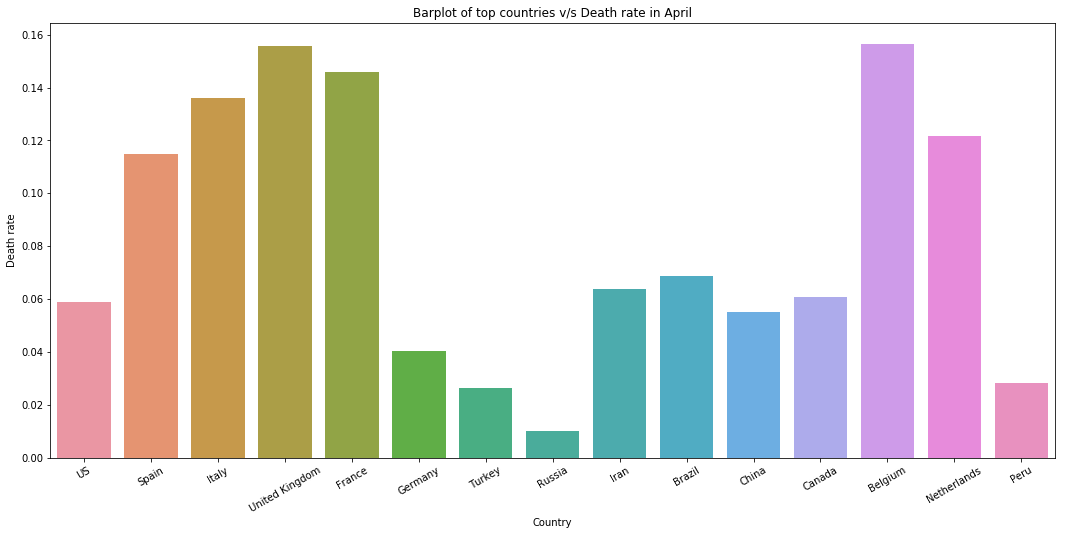

In [33]:
plt.figure(figsize=(18,8))
plt.title("Barplot of top countries v/s Death rate in April")
plt.xticks(rotation=30)
sns.barplot(df4['Country'],df4['Death rate'])
plt.show()

Death rate is high in Belgium and United Kingdom in April

In [34]:
df4['Recovery rate']=df4.apply(lambda x:((x.Recovered/x.Confirmed)),axis=1)
df4.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate,Recovery rate
18786,US,1069424,153947,62996,4,30,0.058906,0.143953
18770,Spain,213435,112050,24543,4,30,0.114991,0.524984
18697,Italy,205463,75945,27967,4,30,0.136117,0.369629
18790,United Kingdom,172481,859,26842,4,30,0.155623,0.004980
18674,France,167299,49476,24379,4,30,0.145721,0.295734


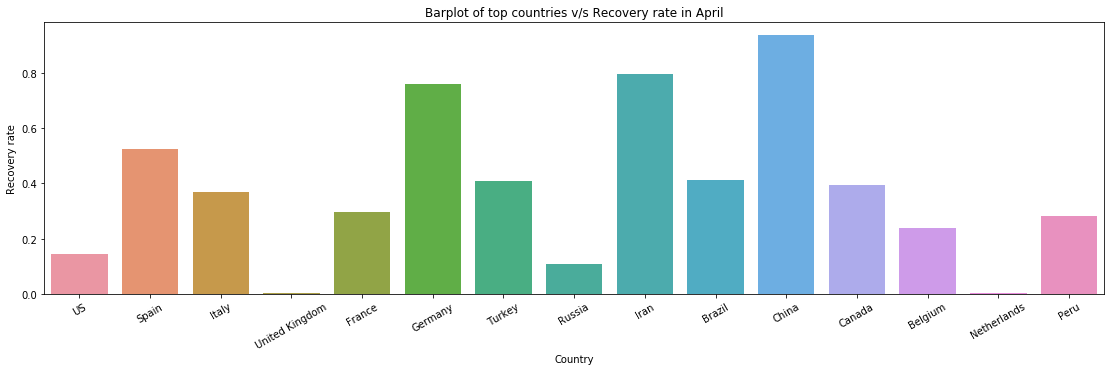

In [35]:
plt.figure(figsize=(19,5))
plt.title("Barplot of top countries v/s Recovery rate in April")
sns.barplot(df4['Country'],df4['Recovery rate'])
plt.xticks(rotation=30)
plt.show()

Recovery rate is highest in China in April

## May

In [36]:
df5=May.sort_values(by=['Confirmed'],ascending=False).head(15)
df5

,Country,Confirmed,Recovered,Deaths,month,day
23674,US,1680913,384902,98913,5,26
23523,Brazil,391222,158593,24512,5,26
23640,Russia,362342,131129,3807,5,26
23678,United Kingdom,266599,1161,37130,5,26
23658,Spain,236259,150376,27117,5,26
23585,Italy,230555,144658,32955,5,26
23562,France,182847,65997,28533,5,26
23566,Germany,181200,161967,8372,5,26
23673,Turkey,158762,121507,4397,5,26
23579,India,150793,64277,4344,5,26


In [37]:
df5['Death rate']=df5.apply(lambda x:((x.Deaths/x.Confirmed)),axis=1)
df5.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate
23674,US,1680913,384902,98913,5,26,0.058845
23523,Brazil,391222,158593,24512,5,26,0.062655
23640,Russia,362342,131129,3807,5,26,0.010507
23678,United Kingdom,266599,1161,37130,5,26,0.139273
23658,Spain,236259,150376,27117,5,26,0.114777


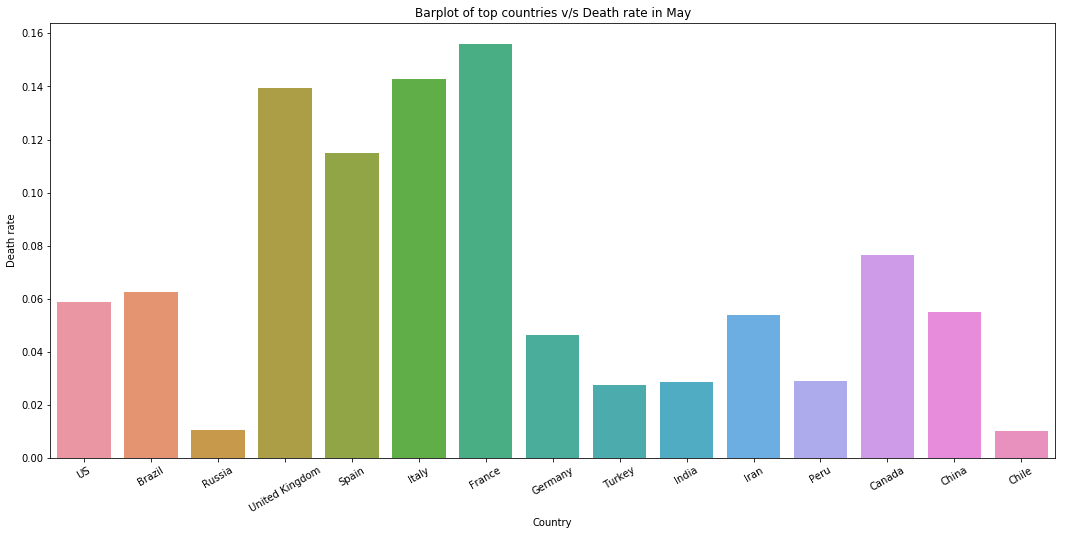

In [38]:
plt.figure(figsize=(18,8))
plt.title("Barplot of top countries v/s Death rate in May")
plt.xticks(rotation=30)
sns.barplot(df5['Country'],df5['Death rate'])
plt.show()

In May, UK, Italy and France have seen a steep increase in Death rates

In [39]:
df5['Recovery rate']=df5.apply(lambda x:((x.Recovered/x.Confirmed)),axis=1)
df5.head()

,Country,Confirmed,Recovered,Deaths,month,day,Death rate,Recovery rate
23674,US,1680913,384902,98913,5,26,0.058845,0.228984
23523,Brazil,391222,158593,24512,5,26,0.062655,0.405379
23640,Russia,362342,131129,3807,5,26,0.010507,0.361893
23678,United Kingdom,266599,1161,37130,5,26,0.139273,0.004355
23658,Spain,236259,150376,27117,5,26,0.114777,0.636488


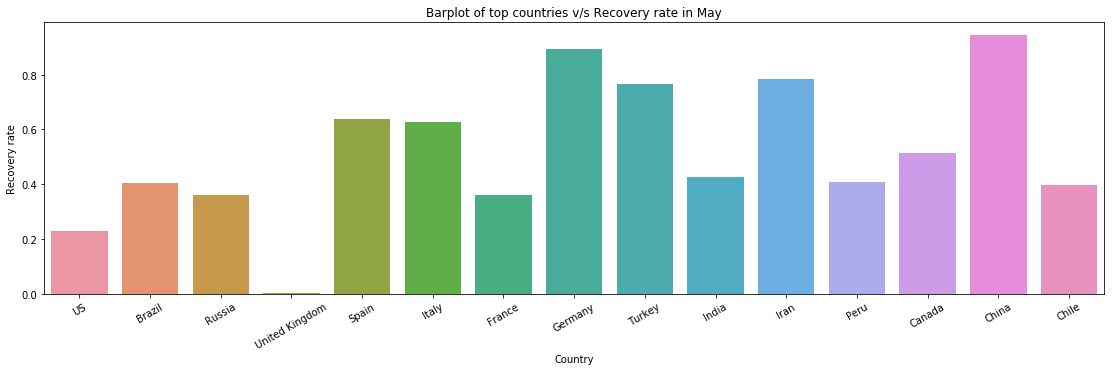

In [40]:
plt.figure(figsize=(19,5))
plt.title("Barplot of top countries v/s Recovery rate in May")
sns.barplot(df5['Country'],df5['Recovery rate'])
plt.xticks(rotation=30)
plt.show()

In May, recovery rate has increased in China and Germany. While the recovery rate is very low in UK.

## Line plots of Confirmed, Recovered and Deaths for some countries

## CHINA

In [41]:
p=df1[df1['Country']=='China']
a=p['Deaths'].values[0]
aa=p['Confirmed'].values[0]
aaa=p['Recovered'].values[0]

s=df2[df2['Country']=='China']
b=s['Deaths'].values[0]
bb=s['Confirmed'].values[0]
bbb=s['Recovered'].values[0]


t=df3[df3['Country']=='China']
c=t['Deaths'].values[0]
cc=t['Confirmed'].values[0]
ccc=t['Recovered'].values[0]


u=df4[df4['Country']=='China']
d=u['Deaths'].values[0]
dd=u['Confirmed'].values[0]
ddd=u['Recovered'].values[0]


v=df5[df5['Country']=='China']
e=v['Deaths'].values[0]
ee=v['Confirmed'].values[0]
eee=v['Recovered'].values[0]


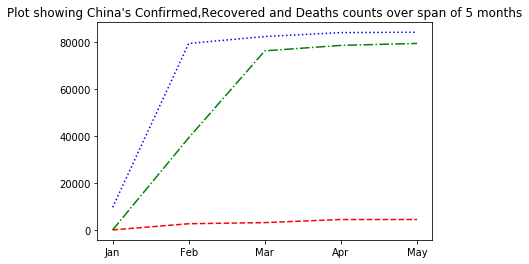

In [42]:
data=[['Jan',a,aa,aaa],['Feb',b,bb,bbb],['Mar',c,cc,ccc],['Apr',d,dd,ddd],['May',e,ee,eee]]
xy=pd.DataFrame(data,columns=['Months','Deaths','Confirmed','Recovered'])
plt.plot(xy['Months'],xy['Deaths'],color='red',linestyle='dashed')
plt.plot(xy['Months'],xy['Confirmed'],color='blue',linestyle='dotted')
plt.plot(xy['Months'],xy['Recovered'],color='green',linestyle='dashdot')
plt.title("Plot showing China's Confirmed,Recovered and Deaths counts over span of 5 months")
plt.show()

## US

In [43]:
p=df1[df1['Country']=='US']
a=p['Deaths'].values[0]
aa=p['Confirmed'].values[0]
aaa=p['Recovered'].values[0]

s=df2[df2['Country']=='US']
b=s['Deaths'].values[0]
bb=s['Confirmed'].values[0]
bbb=s['Recovered'].values[0]


t=df3[df3['Country']=='US']
c=t['Deaths'].values[0]
cc=t['Confirmed'].values[0]
ccc=t['Recovered'].values[0]


u=df4[df4['Country']=='US']
d=u['Deaths'].values[0]
dd=u['Confirmed'].values[0]
ddd=u['Recovered'].values[0]


v=df5[df5['Country']=='US']
e=v['Deaths'].values[0]
ee=v['Confirmed'].values[0]
eee=v['Recovered'].values[0]


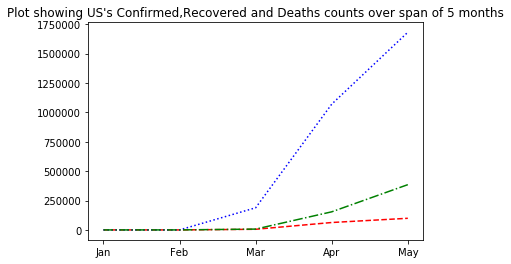

In [44]:
data=[['Jan',a,aa,aaa],['Feb',b,bb,bbb],['Mar',c,cc,ccc],['Apr',d,dd,ddd],['May',e,ee,eee]]
xy=pd.DataFrame(data,columns=['Months','Deaths','Confirmed','Recovered'])
plt.plot(xy['Months'],xy['Deaths'],color='red',linestyle='dashed')
plt.plot(xy['Months'],xy['Confirmed'],color='blue',linestyle='dotted')
plt.plot(xy['Months'],xy['Recovered'],color='green',linestyle='dashdot')
plt.title("Plot showing US's Confirmed,Recovered and Deaths counts over span of 5 months")
plt.show()

## ITALY

In [45]:
p=df1[df1['Country']=='Italy']
#a=p['Deaths'].values[0]
#aa=p['Confirmed'].values[0]
#aaa=p['Recovered'].values[0]

s=df2[df2['Country']=='Italy']
b=s['Deaths'].values[0]
bb=s['Confirmed'].values[0]
bbb=s['Recovered'].values[0]


t=df3[df3['Country']=='Italy']
c=t['Deaths'].values[0]
cc=t['Confirmed'].values[0]
ccc=t['Recovered'].values[0]


u=df4[df4['Country']=='Italy']
d=u['Deaths'].values[0]
dd=u['Confirmed'].values[0]
ddd=u['Recovered'].values[0]


v=df5[df5['Country']=='Italy']
e=v['Deaths'].values[0]
ee=v['Confirmed'].values[0]
eee=v['Recovered'].values[0]


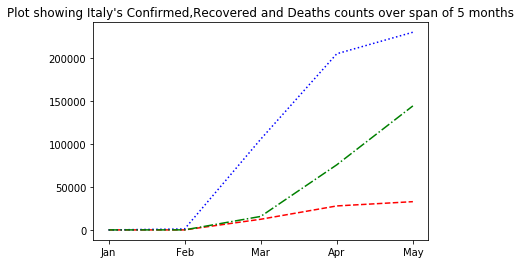

In [46]:
data=[['Jan',a,aa,aaa],['Feb',b,bb,bbb],['Mar',c,cc,ccc],['Apr',d,dd,ddd],['May',e,ee,eee]]
xy=pd.DataFrame(data,columns=['Months','Deaths','Confirmed','Recovered'])
plt.plot(xy['Months'],xy['Deaths'],color='red',linestyle='dashed')
plt.plot(xy['Months'],xy['Confirmed'],color='blue',linestyle='dotted')
plt.plot(xy['Months'],xy['Recovered'],color='green',linestyle='dashdot')
plt.title("Plot showing Italy's Confirmed,Recovered and Deaths counts over span of 5 months")
plt.show()

## UNITED KINGDOM

In [47]:
p=df1[df1['Country']=='United Kingdom']
#a=p['Deaths'].values[0]
#aa=p['Confirmed'].values[0]
#aaa=p['Recovered'].values[0]

s=df2[df2['Country']=='United Kingdom']
#b=s['Deaths'].values[0]
#bb=s['Confirmed'].values[0]
#bbb=s['Recovered'].values[0]


t=df3[df3['Country']=='United Kingdom']
c=t['Deaths'].values[0]
cc=t['Confirmed'].values[0]
ccc=t['Recovered'].values[0]


u=df4[df4['Country']=='United Kingdom']
d=u['Deaths'].values[0]
dd=u['Confirmed'].values[0]
ddd=u['Recovered'].values[0]


v=df5[df5['Country']=='United Kingdom']
e=v['Deaths'].values[0]
ee=v['Confirmed'].values[0]
eee=v['Recovered'].values[0]


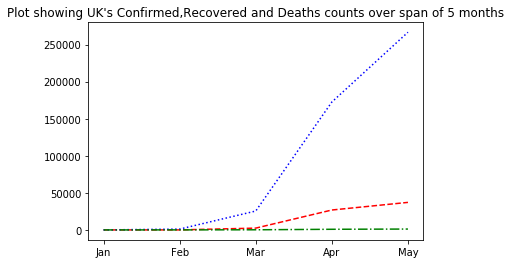

In [48]:
data=[['Jan',a,aa,aaa],['Feb',b,bb,bbb],['Mar',c,cc,ccc],['Apr',d,dd,ddd],['May',e,ee,eee]]
xy=pd.DataFrame(data,columns=['Months','Deaths','Confirmed','Recovered'])
plt.plot(xy['Months'],xy['Deaths'],color='red',linestyle='dashed')
plt.plot(xy['Months'],xy['Confirmed'],color='blue',linestyle='dotted')
plt.plot(xy['Months'],xy['Recovered'],color='green',linestyle='dashdot')
plt.title("Plot showing UK's Confirmed,Recovered and Deaths counts over span of 5 months")
plt.show()

## INDIA

In [49]:
p=df1[df1['Country']=='India']
#a=p['Deaths'].values[0]
#aa=p['Confirmed'].values[0]
#aaa=p['Recovered'].values[0]

s=df2[df2['Country']=='India']
#b=s['Deaths'].values[0]
#bb=s['Confirmed'].values[0]
#bbb=s['Recovered'].values[0]


t=df3[df3['Country']=='India']
#c=t['Deaths'].values[0]
#cc=t['Confirmed'].values[0]
#ccc=t['Recovered'].values[0]


u=df4[df4['Country']=='India']
#d=u['Deaths'].values[0]
#dd=u['Confirmed'].values[0]
#ddd=u['Recovered'].values[0]


v=df5[df5['Country']=='India']
e=v['Deaths'].values[0]
ee=v['Confirmed'].values[0]
eee=v['Recovered'].values[0]


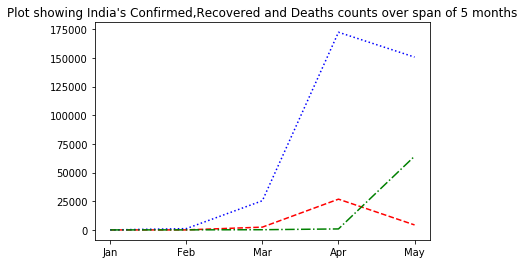

In [50]:
data=[['Jan',a,aa,aaa],['Feb',b,bb,bbb],['Mar',c,cc,ccc],['Apr',d,dd,ddd],['May',e,ee,eee]]
xy=pd.DataFrame(data,columns=['Months','Deaths','Confirmed','Recovered'])
plt.plot(xy['Months'],xy['Deaths'],color='red',linestyle='dashed')
plt.plot(xy['Months'],xy['Confirmed'],color='blue',linestyle='dotted')
plt.plot(xy['Months'],xy['Recovered'],color='green',linestyle='dashdot')
plt.title("Plot showing India's Confirmed,Recovered and Deaths counts over span of 5 months")
plt.show()

## SPAIN

In [51]:
p=df1[df1['Country']=='Spain']
#a=p['Deaths'].values[0]
#aa=p['Confirmed'].values[0]
#aaa=p['Recovered'].values[0]

s=df2[df2['Country']=='Spain']
b=s['Deaths'].values[0]
bb=s['Confirmed'].values[0]
bbb=s['Recovered'].values[0]


t=df3[df3['Country']=='Spain']
c=t['Deaths'].values[0]
cc=t['Confirmed'].values[0]
ccc=t['Recovered'].values[0]


u=df4[df4['Country']=='Spain']
d=u['Deaths'].values[0]
dd=u['Confirmed'].values[0]
ddd=u['Recovered'].values[0]


v=df5[df5['Country']=='Spain']
e=v['Deaths'].values[0]
ee=v['Confirmed'].values[0]
eee=v['Recovered'].values[0]


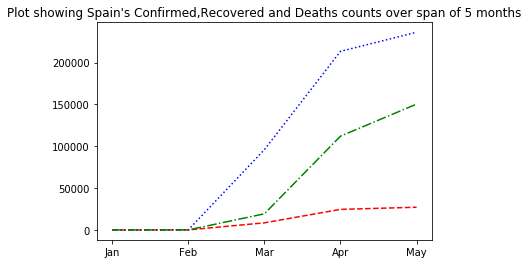

In [52]:
data=[['Jan',a,aa,aaa],['Feb',b,bb,bbb],['Mar',c,cc,ccc],['Apr',d,dd,ddd],['May',e,ee,eee]]
xy=pd.DataFrame(data,columns=['Months','Deaths','Confirmed','Recovered'])
plt.plot(xy['Months'],xy['Deaths'],color='red',linestyle='dashed')
plt.plot(xy['Months'],xy['Confirmed'],color='blue',linestyle='dotted')
plt.plot(xy['Months'],xy['Recovered'],color='green',linestyle='dashdot')
plt.title("Plot showing Spain's Confirmed,Recovered and Deaths counts over span of 5 months")
plt.show()

## BRAZIL

In [53]:
p=df1[df1['Country']=='Brazil']
#a=p['Deaths'].values[0]
#aa=p['Confirmed'].values[0]
#aaa=p['Recovered'].values[0]

s=df2[df2['Country']=='Brazil']
#b=s['Deaths'].values[0]
#bb=s['Confirmed'].values[0]
#bbb=s['Recovered'].values[0]


t=df3[df3['Country']=='Brazil']
#c=t['Deaths'].values[0]
#cc=t['Confirmed'].values[0]
#ccc=t['Recovered'].values[0]


u=df4[df4['Country']=='Brazil']
d=u['Deaths'].values[0]
dd=u['Confirmed'].values[0]
ddd=u['Recovered'].values[0]


v=df5[df5['Country']=='Brazil']
e=v['Deaths'].values[0]
ee=v['Confirmed'].values[0]
eee=v['Recovered'].values[0]


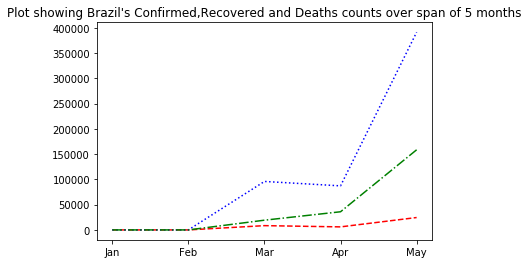

In [54]:
data=[['Jan',a,aa,aaa],['Feb',b,bb,bbb],['Mar',c,cc,ccc],['Apr',d,dd,ddd],['May',e,ee,eee]]
xy=pd.DataFrame(data,columns=['Months','Deaths','Confirmed','Recovered'])
plt.plot(xy['Months'],xy['Deaths'],color='red',linestyle='dashed')
plt.plot(xy['Months'],xy['Confirmed'],color='blue',linestyle='dotted')
plt.plot(xy['Months'],xy['Recovered'],color='green',linestyle='dashdot')
plt.title("Plot showing Brazil's Confirmed,Recovered and Deaths counts over span of 5 months")
plt.show()